In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dengueSintomas.csv')  
df.head()

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,13-Jan,10.0,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,21,140,yes
1,P002,13-Feb,4.0,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22,80,no
2,P003,9-Jan,5.0,104.0,4.3,yes,no,no,yes,yes,yes,yes,no,9.3,24,120,yes
3,P004,12-Aug,12.0,101.0,1.8,yes,yes,no,no,no,no,no,no,11.2,25,50,no
4,P005,12-Oct,3.0,101.0,3.2,yes,no,no,no,no,no,yes,no,13.6,22,95,no


In [2]:
# Obtener información sobre las columnas y sus tipos de datos
df.info()

# Verificar la cantidad de valores nulos
df.isnull().sum()

# Ver estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_paciente               1820 non-null   object 
 1   fecha_inicio_fiebre       1820 non-null   object 
 2   dias_con_fiebre           1820 non-null   float64
 3   temperatura_actual        1820 non-null   float64
 4   globulos_blancos          1820 non-null   float64
 5   dolor_cabeza_severo       1820 non-null   object 
 6   dolor_detras_ojos         1820 non-null   object 
 7   dolor_articular_muscular  1820 non-null   object 
 8   sabor_metalico_boca       1820 non-null   object 
 9   perdida_apetito           1820 non-null   object 
 10  dolor_abdominal           1820 non-null   object 
 11  nauseas_vomitos           1820 non-null   object 
 12  diarrea                   1820 non-null   object 
 13  hemoglobina               1820 non-null   float64
 14  hematocr

,dias_con_fiebre,temperatura_actual,globulos_blancos,hemoglobina,hematocrito,plaquetas
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,6.432967,103.087912,3.025000,13.351786,32.080769,96.276374
std,3.601724,21.860645,1.272635,3.142119,7.385822,33.702430
min,1.000000,99.000000,1.000000,7.600000,18.000000,35.000000
25%,4.000000,102.000000,2.100000,10.600000,26.000000,74.000000
50%,6.000000,103.000000,2.950000,13.400000,32.000000,95.000000
75%,8.000000,104.000000,4.000000,15.900000,38.000000,120.000000
max,21.000000,1033.000000,24.000000,19.800000,47.000000,875.000000


In [3]:
# Convertir la columna de fecha en formato datetime
df['fecha_inicio_fiebre'] = pd.to_datetime(df['fecha_inicio_fiebre'], format='%d-%b')

# Convertir las columnas con valores binarios a tipo 'category'
columnas_categoricas = [
    'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular', 
    'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal', 
    'nauseas_vomitos', 'diarrea', 'dengue'
]

df[columnas_categoricas] = df[columnas_categoricas].astype('category')

df['dias_con_fiebre'] = df['dias_con_fiebre'].astype('int')

df.info()  
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_paciente               1820 non-null   object        
 1   fecha_inicio_fiebre       1820 non-null   datetime64[ns]
 2   dias_con_fiebre           1820 non-null   int64         
 3   temperatura_actual        1820 non-null   float64       
 4   globulos_blancos          1820 non-null   float64       
 5   dolor_cabeza_severo       1820 non-null   category      
 6   dolor_detras_ojos         1820 non-null   category      
 7   dolor_articular_muscular  1820 non-null   category      
 8   sabor_metalico_boca       1820 non-null   category      
 9   perdida_apetito           1820 non-null   category      
 10  dolor_abdominal           1820 non-null   category      
 11  nauseas_vomitos           1820 non-null   category      
 12  diarrea             

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,1900-01-13,10,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,21,140,yes
1,P002,1900-02-13,4,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22,80,no
2,P003,1900-01-09,5,104.0,4.3,yes,no,no,yes,yes,yes,yes,no,9.3,24,120,yes
3,P004,1900-08-12,12,101.0,1.8,yes,yes,no,no,no,no,no,no,11.2,25,50,no
4,P005,1900-10-12,3,101.0,3.2,yes,no,no,no,no,no,yes,no,13.6,22,95,no


# CONVERTIR COLUMNAS DE SINTOMAS A 1 Y 0

In [4]:
# Lista de columnas que contienen respuestas tipo "yes"/"no"
columnas_binarias = [
    'dolor_cabeza_severo',
    'dolor_detras_ojos',
    'dolor_articular_muscular',
    'sabor_metalico_boca',
    'perdida_apetito',
    'dolor_abdominal',
    'nauseas_vomitos',
    'diarrea',
]

# Convertimos los valores: 'yes' -> 1 y 'no' -> 0
df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})

# Verificamos los primeros registros de estas columnas para asegurarnos que la conversión fue correcta
df.head()

C:\Users\angel\AppData\Local\Temp\ipykernel_5440\2752349192.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_5440\2752349192.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_5440\2752349192.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,1900-01-13,10,100.0,5.0,1,0,0,1,1,1,0,1,15.0,21,140,yes
1,P002,1900-02-13,4,104.0,1.0,0,1,1,0,0,0,0,0,9.0,22,80,no
2,P003,1900-01-09,5,104.0,4.3,1,0,0,1,1,1,1,0,9.3,24,120,yes
3,P004,1900-08-12,12,101.0,1.8,1,1,0,0,0,0,0,0,11.2,25,50,no
4,P005,1900-10-12,3,101.0,3.2,1,0,0,0,0,0,1,0,13.6,22,95,no


# TRATAMIENTO DE OUTLIERS

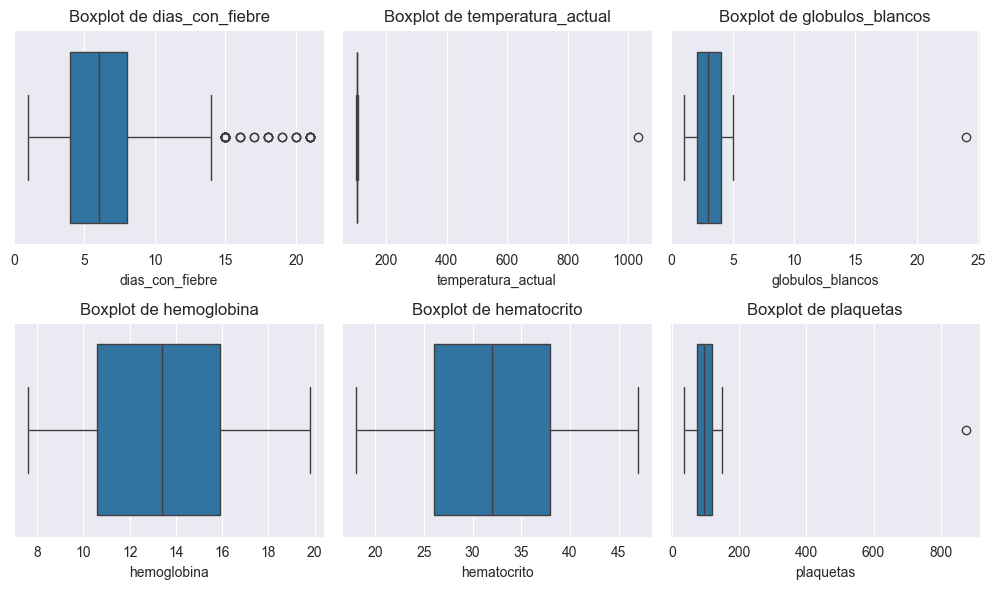

In [5]:
# Visualización de Outliers: Boxplots antes del tratamiento

# Columnas numéricas relevantes para el análisis
columnas_numericas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos', 
                      'hemoglobina', 'hematocrito', 'plaquetas']

# Crear un gráfico de caja (boxplot) para cada una de las columnas numéricas
plt.figure(figsize=(10, 6))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    
plt.tight_layout()
plt.show()


In [6]:
# Imputar valores atípicos con la mediana
for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = np.where(df[columna] < limite_inferior, df[columna].median(), df[columna])
    df[columna] = np.where(df[columna] > limite_superior, df[columna].median(), df[columna])


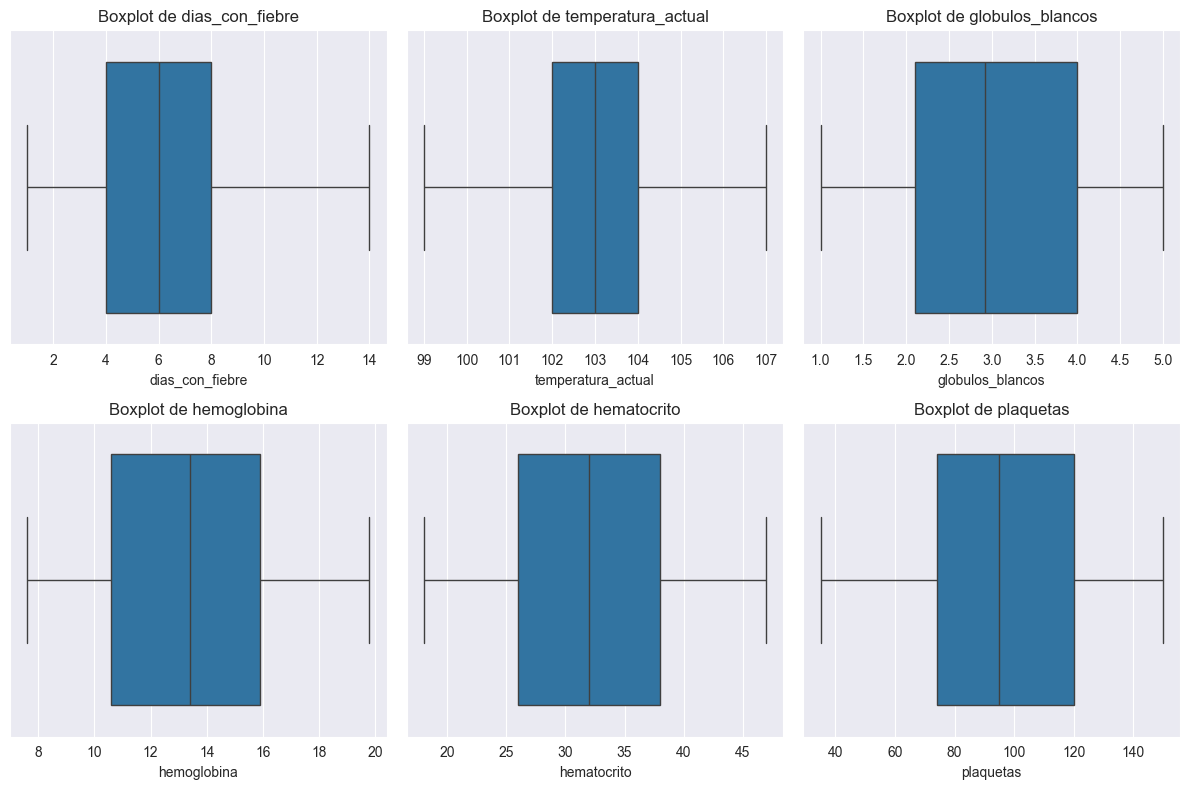

In [7]:
# Visualización de Outliers: Boxplots después del tratamiento

plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    
plt.tight_layout()
plt.show()


# MATRIZ DE CORRELACIÓN

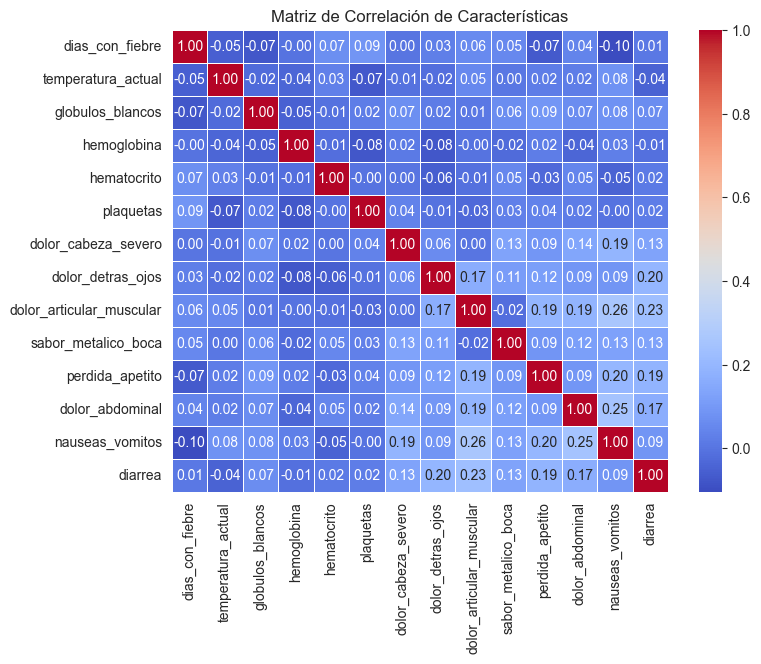

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_completas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos', 
                       'hemoglobina', 'hematocrito', 'plaquetas', 
                       'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular', 
                       'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal', 
                       'nauseas_vomitos', 'diarrea', 'dengue']  # Asegúrate de que estas columnas estén correctamente definidas

# 1. Calcular la matriz de correlación
correlation_matrix = df[columnas_completas].drop('dengue', axis=1).corr()

# 2. Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.show()


In [9]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

columnas_completas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos', 
                       'hemoglobina', 'hematocrito', 'plaquetas', 
                       'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular', 
                       'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal', 
                       'nauseas_vomitos', 'diarrea', 'dengue']  # Asegúrate de que estas columnas estén correctamente definidas

# 1. Preparar los datos (características y etiqueta)
X = df[columnas_completas].drop('dengue', axis=1)  # Eliminar la columna "dengue" de las características
y = df['dengue'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir "yes"/"no" en 1/0

# 2. Estandarización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Estandarizar las características

# 3. Aplicar PCA para reducir dimensionalidad (por ejemplo, a 5 componentes)
pca = PCA(n_components=2)  # Reducir a 5 componentes principales
X_pca = pca.fit_transform(X_scaled)  # Aplicar PCA

# 4. Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Entrenar el clasificador SVM
svm_model = SVC(kernel='linear')  # Usamos un SVM con kernel lineal
svm_model.fit(X_train, y_train)

# 6. Hacer predicciones sobre el conjunto de prueba
y_pred = svm_model.predict(X_test)

# 7. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.9643
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       147
           1       1.00      0.94      0.97       217

    accuracy                           0.96       364
   macro avg       0.96      0.97      0.96       364
weighted avg       0.97      0.96      0.96       364




Precisión con kernel 'linear': 0.9643
Reporte de clasificación con kernel 'linear':
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       147
           1       1.00      0.94      0.97       217

    accuracy                           0.96       364
   macro avg       0.96      0.97      0.96       364
weighted avg       0.97      0.96      0.96       364


Precisión con kernel 'poly': 0.9533
Reporte de clasificación con kernel 'poly':
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       147
           1       0.96      0.96      0.96       217

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364


Precisión con kernel 'rbf': 0.9670
Reporte de clasificación con kernel 'rbf':
              precision    recall  f1-score   support

           0       0.92      1.00      0.96   

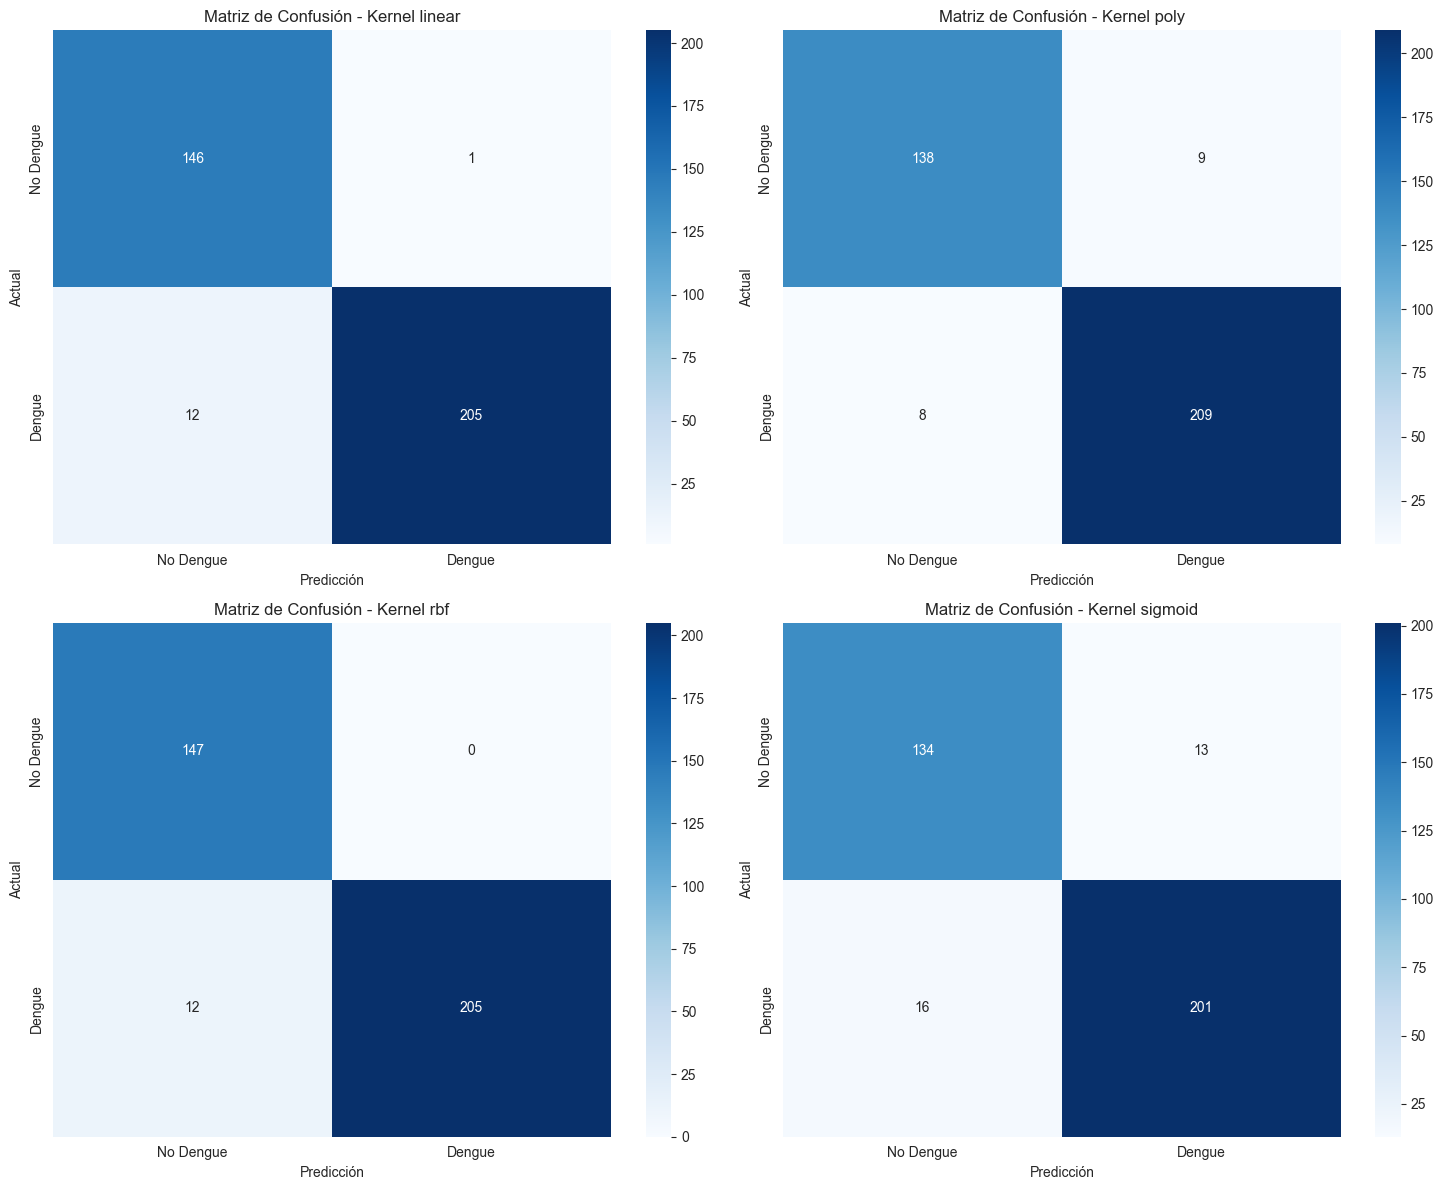

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los kernels a probar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Inicializar la figura para las matrices de confusión
plt.figure(figsize=(15, 12))

# Iterar sobre cada kernel y entrenar el modelo
for i, kernel in enumerate(kernels, 1):
    # Entrenar el modelo SVM con el kernel seleccionado
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = svm_model.predict(X_test)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nPrecisión con kernel '{kernel}': {accuracy:.4f}")

    # Mostrar el reporte de clasificación
    print(f"Reporte de clasificación con kernel '{kernel}':")
    print(classification_report(y_test, y_pred))

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión
    plt.subplot(2, 2, i)  # Dividir la figura en 2x2
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dengue', 'Dengue'], yticklabels=['No Dengue', 'Dengue'])
    plt.title(f'Matriz de Confusión - Kernel {kernel}')
    plt.xlabel('Predicción')
    plt.ylabel('Actual')

# Mostrar las matrices de confusión
plt.tight_layout()
plt.show()

Kernel lineal: Tiene un rendimiento bastante bueno, con solo 12 falsos negativos, lo que indica que el modelo está identificando correctamente la mayoría de los casos positivos (dengue). El único falso positivo es mínimo (1 caso).

Kernel polinómico: Similar al kernel lineal, con buenos resultados y ligeramente menos falsos negativos (8).

Kernel RBF: Este kernel muestra un muy buen desempeño, con 0 falsos positivos, pero 12 falsos negativos.

Kernel sigmoide: Aunque tiene un poco más de falsos positivos y falsos negativos, sigue siendo razonablemente preciso.


Ajustando parámetros para el kernel linear...
Mejores parámetros para el kernel linear: {'C': 10, 'gamma': 'scale'}
Precisión con el modelo ajustado para el kernel 'linear': 0.9670
Reporte de clasificación con kernel 'linear':
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       147
           1       1.00      0.95      0.97       217

    accuracy                           0.97       364
   macro avg       0.96      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364


Ajustando parámetros para el kernel poly...
Mejores parámetros para el kernel poly: {'C': 1, 'gamma': 1}
Precisión con el modelo ajustado para el kernel 'poly': 0.9643
Reporte de clasificación con kernel 'poly':
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       147
           1       0.98      0.96      0.97       217

    accuracy                           0.96       364
   macro avg  

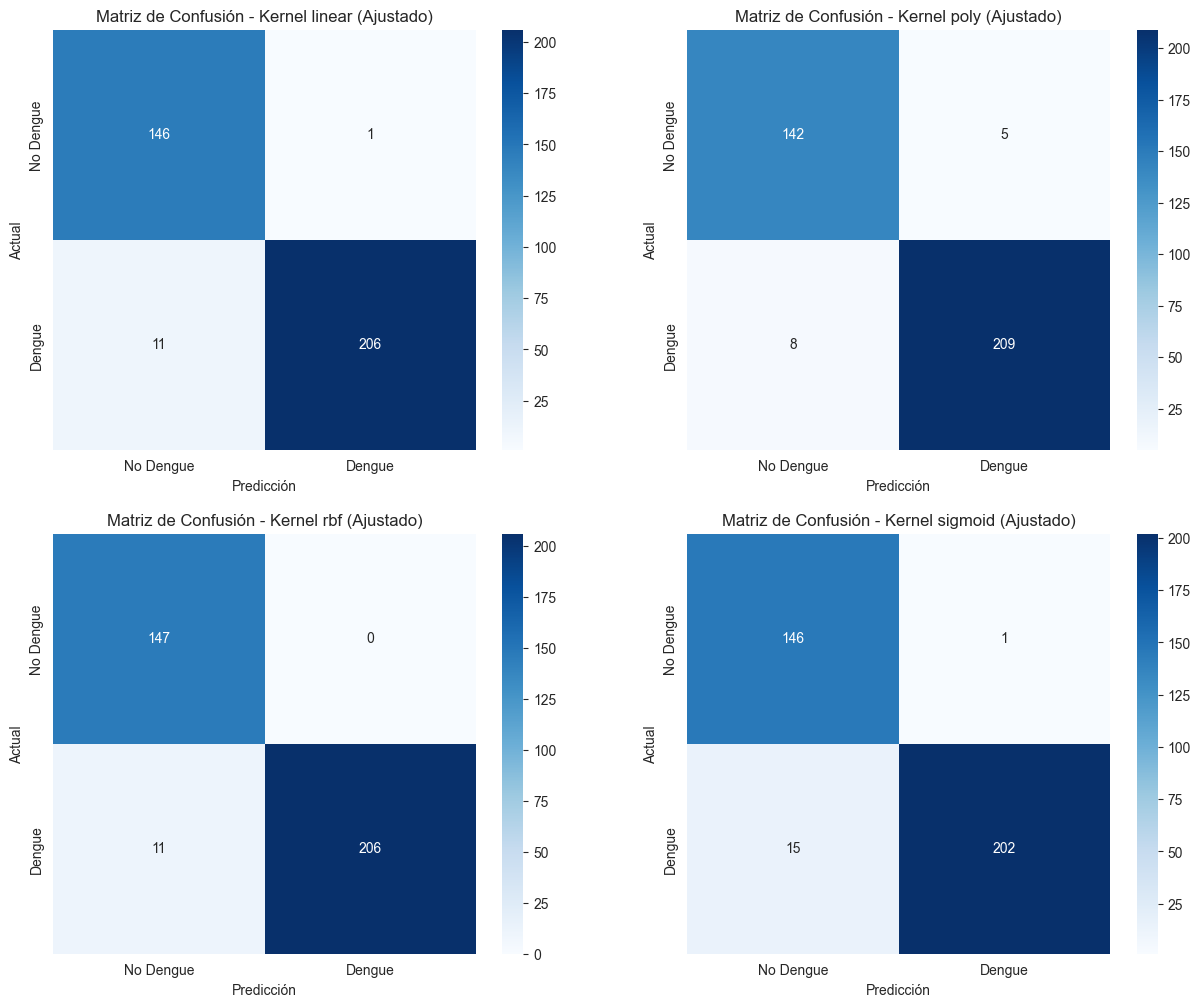

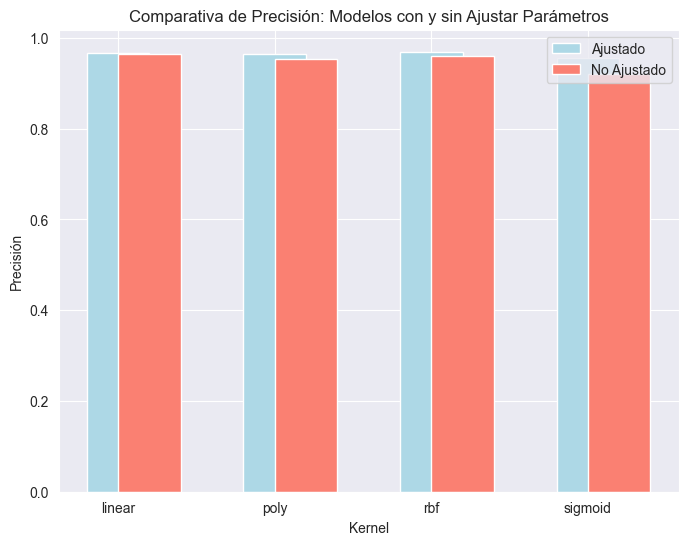

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los kernels a probar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Definir los parámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10],  # Parámetro de regularización
    'gamma': ['scale', 'auto', 0.1, 1]  # Solo aplicable a 'rbf', 'poly' y 'sigmoid'
}

# Inicializar la figura para las matrices de confusión
plt.figure(figsize=(15, 12))

# Definir un diccionario para almacenar los resultados
results = {}

# Iterar sobre cada kernel
for i, kernel in enumerate(kernels, 1):
    print(f"\nAjustando parámetros para el kernel {kernel}...")
    
    # Definir el modelo SVM con el kernel correspondiente
    svm_model = SVC(kernel=kernel)
    
    # Realizar GridSearchCV para encontrar los mejores parámetros
    grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Obtener los mejores parámetros
    best_params = grid_search.best_params_
    print(f"Mejores parámetros para el kernel {kernel}: {best_params}")
    
    # Entrenar el modelo con los mejores parámetros encontrados
    best_model = grid_search.best_estimator_
    
    # Hacer predicciones sobre el conjunto de prueba
    y_pred = best_model.predict(X_test)
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión con el modelo ajustado para el kernel '{kernel}': {accuracy:.4f}")
    
    # Almacenar el resultado
    results[kernel] = accuracy
    
    # Mostrar el reporte de clasificación
    print(f"Reporte de clasificación con kernel '{kernel}':")
    print(classification_report(y_test, y_pred))
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Graficar la matriz de confusión
    plt.subplot(2, 2, i)  # Dividir la figura en 2x2
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dengue', 'Dengue'], yticklabels=['No Dengue', 'Dengue'])
    plt.title(f'Matriz de Confusión - Kernel {kernel} (Ajustado)')
    plt.xlabel('Predicción')
    plt.ylabel('Actual')

# Graficar comparativa de precisión de los modelos ajustados y no ajustados
plt.figure(figsize=(8, 6))

# Precisión con modelos sin ajustar
no_adjusted_accuracy = {
    'linear': 0.9643,
    'poly': 0.9533,
    'rbf': 0.9600,
    'sigmoid': 0.9200
}

# Comparar precisión ajustada vs no ajustada
kernels_list = list(results.keys())
adjusted_accuracies = list(results.values())
no_adjusted_accuracies = [no_adjusted_accuracy[kernel] for kernel in kernels_list]

plt.bar(kernels_list, adjusted_accuracies, width=0.4, label="Ajustado", align='center', color='lightblue')
plt.bar(kernels_list, no_adjusted_accuracies, width=0.4, label="No Ajustado", align='edge', color='salmon')

plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.title('Comparativa de Precisión: Modelos con y sin Ajustar Parámetros')
plt.legend()
plt.show()


# ESTANDARIZACIÓN

In [12]:
# Columnas numéricas que necesitan estandarización
columnas_numericas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos', 
                       'hemoglobina', 'hematocrito', 'plaquetas']

# Columnas binarias que no deben ser estandarizadas
columnas_binarias = ['dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular', 
                     'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal', 
                     'nauseas_vomitos', 'diarrea']

# Estandarizar solo las columnas numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Verificar que solo las columnas numéricas fueron estandarizadas
df.head()

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,1900-01-13,1.192462,-1.724015,1.693012,1,0,0,1,1,1,0,1,0.524699,-1.500688,1.559210,yes
1,P002,1900-02-13,-0.682511,0.952068,-1.715909,0,1,1,0,0,0,0,0,-1.385365,-1.365256,-0.559656,no
2,P003,1900-01-09,-0.370015,0.952068,1.096450,1,0,0,1,1,1,1,0,-1.289862,-1.094393,0.852921,yes
3,P004,1900-08-12,1.817453,-1.054994,-1.034125,1,1,0,0,0,0,0,0,-0.685008,-0.958961,-1.619089,no
4,P005,1900-10-12,-0.995006,-1.054994,0.158997,1,0,0,0,0,0,1,0,0.079018,-1.365256,-0.029940,no


# PCA

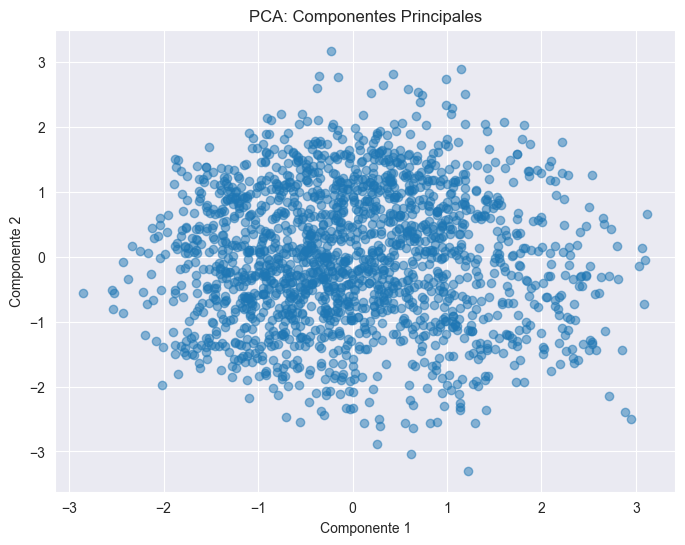

Varianza explicada por cada componente: [0.15099973 0.14297142]


In [13]:
# Seleccionar las columnas numéricas y las columnas de síntomas (ya estandarizadas)
columnas_completas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos', 
                       'hemoglobina', 'hematocrito', 'plaquetas', 
                       'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular', 
                       'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal', 
                       'nauseas_vomitos', 'diarrea']

# Aplicar PCA a todo el conjunto de características (incluyendo síntomas y columnas numéricas)
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para visualización
componentes_principales = pca.fit_transform(df[columnas_completas])

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])

# Graficar los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], alpha=0.5)
plt.title('PCA: Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Ver la varianza explicada por cada componente
print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Carga de cada variable en cada componente principal:
   dias_con_fiebre  temperatura_actual  globulos_blancos  hemoglobina  \
0         0.627233           -0.377366         -0.106496    -0.208874   
1        -0.325788           -0.095189          0.669184    -0.504360   

   hematocrito  plaquetas  dolor_cabeza_severo  dolor_detras_ojos  \
0     0.228843   0.591738             0.003102           0.010250   
1    -0.251547   0.328614             0.018614           0.039184   

   dolor_articular_muscular  sabor_metalico_boca  perdida_apetito  \
0                 -0.005735             0.028686        -0.026920   
1                  0.000127             0.026615         0.056779   

   dolor_abdominal  nauseas_vomitos   diarrea  
0         0.020291        -0.065609  0.016404  
1         0.036427         0.054300  0.035528  


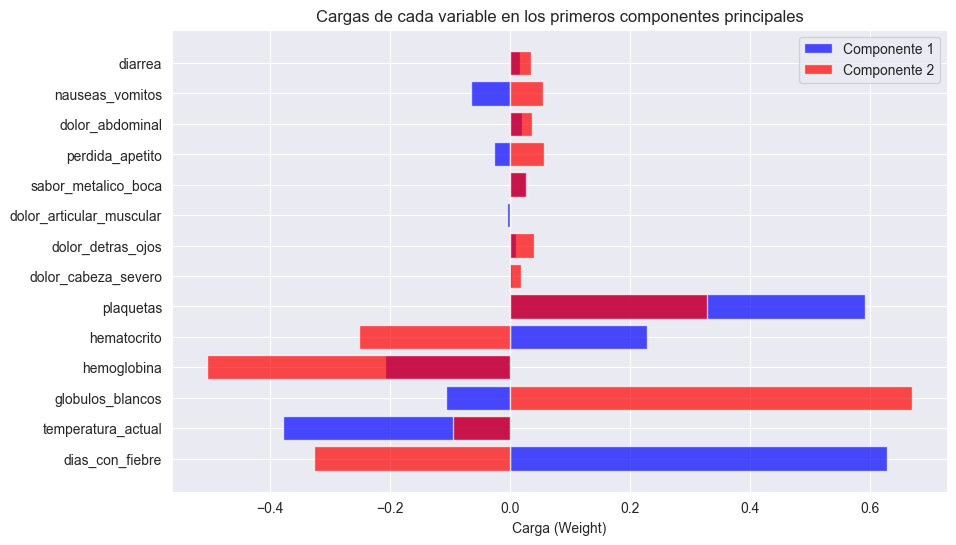

In [14]:
# Obtener los loadings de los componentes principales
componentes_carga = pd.DataFrame(pca.components_, columns=columnas_completas)

# Visualizar la carga (cual es el peso de cada variable en cada componente)
print("Carga de cada variable en cada componente principal:")
print(componentes_carga)

# Graficar los loadings de los dos primeros componentes
plt.figure(figsize=(10, 6))
plt.barh(columnas_completas, componentes_carga.loc[0], color='blue', alpha=0.7, label="Componente 1")
plt.barh(columnas_completas, componentes_carga.loc[1], color='red', alpha=0.7, label="Componente 2")
plt.xlabel('Carga (Weight)')
plt.title('Cargas de cada variable en los primeros componentes principales')
plt.legend()
plt.show()
